## Cosine Similarity 

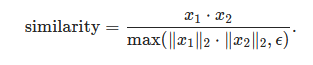

#### Between 1 dimensional matrices or for single token embeddings

Let each token be represented by 'E' embedding vectors (e.g. 5 in case below), we calculate cosine simialrity and observe the results.

In [1]:
import torch

In [2]:
x1 = torch.randn(1,5).flatten()
x2 = torch.randn(1,5).flatten()
print(x1,x2)

tensor([ 0.2529, -1.2352, -0.1684,  0.2056, -0.0381]) tensor([-0.2762,  0.0028,  0.2351, -1.5043, -0.0251])


`Caution`: Keep check of tensor dimensions, randn gives 2-d tensor, so use flatten() to get 1-d tensor.

In [3]:
x1x2 = torch.dot(x1.squeeze(),x2.squeeze())
print(x1x2)

tensor(-0.4213)


In [4]:
den = torch.norm(x1,dim=0)*torch.norm(x2,dim=0)
den

tensor(1.9951)

In [5]:
score = x1x2 / den
score

tensor(-0.2112)

Verifying in numpy

In [6]:
import numpy as np
np.dot(x1.numpy(),x2.numpy()) / ( np.linalg.norm(x1.numpy()) * np.linalg.norm(x2.numpy()) )

-0.21117093

Using direct implementation in Pytorch<br>
<br>https://pytorch.org/docs/stable/generated/torch.nn.CosineSimilarity.html <br>
- `dim` (int, optional) – Dimension where cosine similarity is computed. Default: 1.
- `eps` (float, optional) – Small value to avoid division by zero. Default: 1e-8.

In [7]:
cos = torch.nn.CosineSimilarity(dim=-1)

In [8]:
output = cos(x1,x2)
print(output)

tensor(-0.2112)


`Observation 1`: for 1 dimesional matrix (that is one token/word for word level embeddings) we will get one score value irrespective of embedding size.<br>
*shape(cos_sim) for 1xE and 1xE matrices is 1x1.*

### Between multiple tokens embed vectors

We now consider multiple tokens (3 in case below). Now our size increases to 3x5.

In [9]:
x1 = torch.randn(3,5)
x2 = torch.randn(3,5)
print(f'{x1}\n{x2}')

tensor([[ 0.1605, -0.1976,  0.7486, -0.9748, -0.3268],
        [ 1.2063,  1.5380,  0.4492,  0.3619, -0.6589],
        [ 0.0809,  0.4931, -0.1440,  1.7738,  1.2533]])
tensor([[ 0.3088, -0.4771, -1.1066,  1.1779, -1.1083],
        [ 0.6225, -0.1443,  0.0154,  1.9311,  0.1449],
        [ 1.9074,  0.5856,  0.9995, -1.0327, -0.3269]])


In [10]:
output = cos(x1,x2)
print(f'Cosine Similarity : {output}')

Cosine Similarity : tensor([-0.5556,  0.2608, -0.3506])


Its always good idea when learning to cross check manually.

In [11]:
score = []
for i in range(x1.size(0)):
    x1x2 = torch.dot(x1[i],x2[i])
    den = torch.norm(x1[i],dim=0)*torch.norm(x2[i],dim=0)
    score.append(x1x2/den)
score = torch.stack(score)
score

tensor([-0.5556,  0.2608, -0.3506])

`Observation` :  For 3 tokens we get 3 scores which is expected.
<br> *But there seems to be few problems :*
- We are calculating similarity order wise or along indices of sequences. This leads to problem that sentences with words having similar meaning at different positions in sentences will result in lower similarities.
-  We want a single similarity score at the end rather than matrix of similarities.

#### Problem 1

Rather than 3x1 similarity matrix we would like to calculate similarities between each word of both sequences. That is we would require a matrix of size 3x3.

https://pytorch.org/docs/stable/generated/torch.dot.html

In [12]:
score = []
print('doc1 <-> doc2')
for i in range(x1.size(0)):
    for j in range(x1.size(0)):
        score.append(cos(x1[i],x2[j]))
        print(f'tok{i} <-> tok{j} | Cosine Similarity : {cos(x1[i],x2[j]):0.6f}')
score = torch.stack(score).reshape(3,3)
score


doc1 <-> doc2
tok0 <-> tok0 | Cosine Similarity : -0.555626
tok0 <-> tok1 | Cosine Similarity : -0.676687
tok0 <-> tok2 | Cosine Similarity : 0.637864
tok1 <-> tok0 | Cosine Similarity : 0.068217
tok1 <-> tok1 | Cosine Similarity : 0.260845
tok1 <-> tok2 | Cosine Similarity : 0.657279
tok2 <-> tok0 | Cosine Similarity : 0.142489
tok2 <-> tok1 | Cosine Similarity : 0.786926
tok2 <-> tok2 | Cosine Similarity : -0.350599


tensor([[-0.5556, -0.6767,  0.6379],
        [ 0.0682,  0.2608,  0.6573],
        [ 0.1425,  0.7869, -0.3506]])

#### Problem 2

Reference Links: 
- https://www.baeldung.com/cs/sentence-vectors-word2vec

##### Approach 1 : Taking Mean of embeddings for each token in sequence

In [13]:
cos(x1.mean(dim=1),x2.mean(dim=1))

tensor(0.9615)

Other approaches that are mentioned in the article, I would implement them with real text data to get better intuition.